In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates[:10]

[(-4.324189931209929, 115.84499195113557),
 (-30.641273697829256, -29.45089350110726),
 (-56.278903154712324, -164.3693720165387),
 (42.7568957403582, 160.98871755771438),
 (40.85158130773877, -27.912307573112116),
 (42.36501443082673, 108.99280241761204),
 (77.21432713293942, -179.71506087078495),
 (-46.28288185456444, -154.208375502172),
 (66.41083446701424, -126.09827138790982),
 (-89.77900011658215, -149.55363092786308)]

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

martapura id
sao joao da barra br
avarua ck
severo-kurilsk ru
lagoa pt
dongsheng cn
mys shmidta ru
mataura pf
norman wells ca
mataura pf
yellowknife ca
cayenne gf
bluff nz
tura ru
albany au
mataura pf
atuona pf
ushuaia ar
rikitea pf
hobart au
vestmannaeyjar is
northam au
sinnamary gf
bilibino ru
rikitea pf
kalianget id
cape town za
thompson ca
manggar id
arraial do cabo br
alexandria eg
hermanus za
vaini to
nikolskoye ru
new norfolk au
nanortalik gl
punta arenas cl
szikszo hu
port blair in
arraial do cabo br
punta arenas cl
katsuura jp
evanston us
dikson ru
tsihombe mg
jamestown sh
ilulissat gl
tocok ph
hervey bay au
mataura pf
robertsport lr
cabo san lucas mx
palmer us
letka ru
coquimbo cl
norman wells ca
antofagasta cl
berlevag no
ribeira grande pt
provideniya ru
klaksvik fo
attawapiskat ca
illoqqortoormiut gl
fairbanks us
puerto ayora ec
haibowan cn
aguililla mx
mys shmidta ru
punta arenas cl
iqaluit ca
rikitea pf
cape town za
busselton au
mys shmidta ru
barguzin ru
marcona pe
const

ushuaia ar
nikolskoye ru
antofagasta cl
albany au
victoria sc
norfolk us
solvychegodsk ru
busselton au
pevek ru
tasiilaq gl
yulara au
vaini to
albany au
muros es
lavrentiya ru
tuktoyaktuk ca
whitehorse ca
sabya sa
along in
gat ly
bredasdorp za
saldanha za
busselton au
rikitea pf
port alfred za
vardo no
ambilobe mg
general jose eduvigis diaz py
busselton au
butaritari ki
sinkat sd
thompson ca
north bend us
butaritari ki
tsihombe mg
cuenca es
jamestown sh
carnarvon au
corn island ni
buala sb
mataura pf
aklavik ca
ushuaia ar
port macquarie au
rikitea pf
bluff nz
mount pleasant us
taolanaro mg
saint-philippe re
qaanaaq gl
soligalich ru
mar del plata ar
east london za
atikokan ca
morwa in
bethel us
mys shmidta ru
saskylakh ru
busselton au
batagay-alyta ru
atuona pf
bluff nz
port lincoln au
illoqqortoormiut gl
albany au
arraial do cabo br
perbaungan id
yellowknife ca
bandarbeyla so
barrow us
hermanus za
belushya guba ru
ponta do sol cv
sao jose da coroa grande br
atuona pf
mys shmidta ru
bre

cape town za
new norfolk au
launceston au
vaini to
cape town za
cayenne gf
goundam ml
yellowknife ca
hithadhoo mv


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | martapura
Processing Record 2 of Set 1 | sao joao da barra
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | dongsheng
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | cayenne
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | vestmannaeyjar
Processing Record 20 of Set 1 | northam
Processing Record 21 of Set 1 | sinnamary
Processing Record 22 of Set 1 | bilibino
Processi

Processing Record 36 of Set 4 | bronnoysund
Processing Record 37 of Set 4 | turukhansk
Processing Record 38 of Set 4 | aklavik
Processing Record 39 of Set 4 | rawson
Processing Record 40 of Set 4 | te anau
Processing Record 41 of Set 4 | hvide sande
Processing Record 42 of Set 4 | nijar
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | caohai
Processing Record 45 of Set 4 | chelno-vershiny
Processing Record 46 of Set 4 | namatanai
Processing Record 47 of Set 4 | gizo
Processing Record 48 of Set 4 | sabinas hidalgo
Processing Record 49 of Set 4 | acapulco
Processing Record 50 of Set 4 | bethel
Processing Record 1 of Set 5 | grand centre
City not found. Skipping...
Processing Record 2 of Set 5 | sioux lookout
Processing Record 3 of Set 5 | praia
Processing Record 4 of Set 5 | merauke
Processing Record 5 of Set 5 | khatanga
Processing Record 6 of Set 5 | comodoro rivadavia
Processing Record 7 of Set 5 | vilhena
Processing Record 8 of Set 5 | nykoping
Processing R

Processing Record 25 of Set 8 | port macquarie
Processing Record 26 of Set 8 | mount pleasant
Processing Record 27 of Set 8 | soligalich
Processing Record 28 of Set 8 | atikokan
Processing Record 29 of Set 8 | morwa
Processing Record 30 of Set 8 | batagay-alyta
Processing Record 31 of Set 8 | port lincoln
Processing Record 32 of Set 8 | perbaungan
Processing Record 33 of Set 8 | bandarbeyla
Processing Record 34 of Set 8 | ponta do sol
Processing Record 35 of Set 8 | sao jose da coroa grande
Processing Record 36 of Set 8 | hambantota
Processing Record 37 of Set 8 | airai
Processing Record 38 of Set 8 | corowa
Processing Record 39 of Set 8 | gambiran
Processing Record 40 of Set 8 | halalo
City not found. Skipping...
Processing Record 41 of Set 8 | panama city
Processing Record 42 of Set 8 | machala
Processing Record 43 of Set 8 | batemans bay
Processing Record 44 of Set 8 | caravelas
Processing Record 45 of Set 8 | haines junction
Processing Record 46 of Set 8 | talant
Processing Record 

Processing Record 10 of Set 12 | tucurui
Processing Record 11 of Set 12 | shu
Processing Record 12 of Set 12 | nanakuli
Processing Record 13 of Set 12 | falkenberg
Processing Record 14 of Set 12 | saryozek
Processing Record 15 of Set 12 | karaul
City not found. Skipping...
Processing Record 16 of Set 12 | south river
Processing Record 17 of Set 12 | huilong
Processing Record 18 of Set 12 | nyrob
Processing Record 19 of Set 12 | baghmara
Processing Record 20 of Set 12 | waipawa
Processing Record 21 of Set 12 | serenje
Processing Record 22 of Set 12 | asekeyevo
Processing Record 23 of Set 12 | sinegorye
Processing Record 24 of Set 12 | dagua
Processing Record 25 of Set 12 | elko
Processing Record 26 of Set 12 | muriwai beach
Processing Record 27 of Set 12 | longjiang
Processing Record 28 of Set 12 | wylie
Processing Record 29 of Set 12 | chicama
Processing Record 30 of Set 12 | prince rupert
Processing Record 31 of Set 12 | bokspits
City not found. Skipping...
Processing Record 32 of Set

In [13]:
len(city_data)

555

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Martapura,-3.42,114.85,80.60,83,36,1.12,ID,2020-08-22 16:29:16
1,Sao Joao Da Barra,-21.64,-41.05,66.20,93,90,9.17,BR,2020-08-22 16:26:25
2,Avarua,-21.21,-159.78,71.60,78,22,5.82,CK,2020-08-22 16:29:17
3,Severo-Kurilsk,50.68,156.12,48.99,88,22,11.05,RU,2020-08-22 16:29:17
4,Lagoa,39.05,-27.98,71.96,70,0,7.58,PT,2020-08-22 16:29:18
5,Dongsheng,39.82,109.98,67.06,82,100,15.43,CN,2020-08-22 16:29:18
6,Mataura,-46.19,168.86,41.00,97,80,1.72,NZ,2020-08-22 16:29:19
7,Norman Wells,65.28,-126.83,57.20,71,75,11.41,CA,2020-08-22 16:29:19
8,Yellowknife,62.46,-114.35,52.00,76,75,12.75,CA,2020-08-22 16:25:39
9,Cayenne,4.93,-52.33,89.60,59,0,5.82,GF,2020-08-22 16:27:46


In [17]:
# Reorder DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Martapura,ID,2020-08-22 16:29:16,-3.42,114.85,80.60,83,36,1.12
1,Sao Joao Da Barra,BR,2020-08-22 16:26:25,-21.64,-41.05,66.20,93,90,9.17
2,Avarua,CK,2020-08-22 16:29:17,-21.21,-159.78,71.60,78,22,5.82
3,Severo-Kurilsk,RU,2020-08-22 16:29:17,50.68,156.12,48.99,88,22,11.05
4,Lagoa,PT,2020-08-22 16:29:18,39.05,-27.98,71.96,70,0,7.58
5,Dongsheng,CN,2020-08-22 16:29:18,39.82,109.98,67.06,82,100,15.43
6,Mataura,NZ,2020-08-22 16:29:19,-46.19,168.86,41.00,97,80,1.72
7,Norman Wells,CA,2020-08-22 16:29:19,65.28,-126.83,57.20,71,75,11.41
8,Yellowknife,CA,2020-08-22 16:25:39,62.46,-114.35,52.00,76,75,12.75
9,Cayenne,GF,2020-08-22 16:27:46,4.93,-52.33,89.60,59,0,5.82


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Get Data for Plotting

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

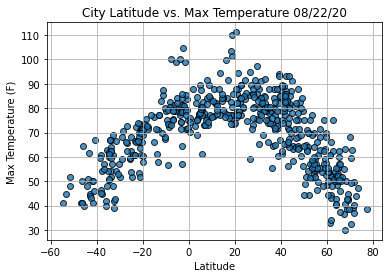

In [21]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

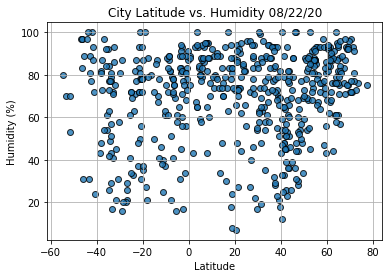

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

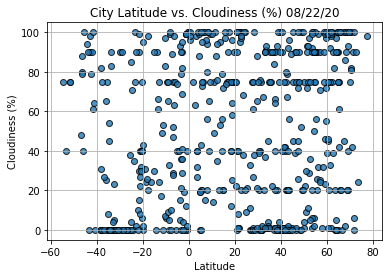

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

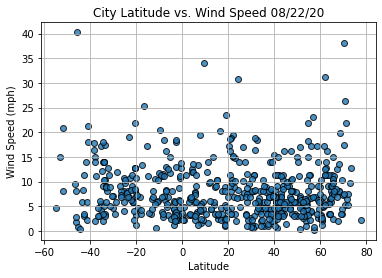

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()